In [206]:
import statsmodels
import scipy as sc
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [207]:
data = pd.read_csv('botswana.tsv',sep='\t')

In [208]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,evermarr,agefm,heduc,urban,electric,radio,tv,bicycle
0,0,18,10,catholic,4.0,1.0,1.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
1,2,43,11,protestant,2.0,1.0,1.0,1,20.0,14.0,1,1.0,1.0,1.0,1.0
2,0,49,4,spirit,4.0,1.0,0.0,1,22.0,1.0,1,1.0,1.0,0.0,0.0
3,0,24,12,other,2.0,1.0,0.0,0,NaN,NaN,1,1.0,1.0,1.0,1.0
4,3,32,13,other,3.0,1.0,1.0,1,24.0,12.0,1,1.0,1.0,1.0,1.0


## Task 1

In [209]:
data.religion.value_counts()

spirit        1841
other         1080
protestant     993
catholic       447
Name: religion, dtype: int64

## Task 2

In [210]:
data.shape[0]

4361

In [211]:
datanan = data.dropna()

In [212]:
datanan.shape[0]

1834

## Task 3

In [213]:
data['nevermarr'] = data['agefm']

#data['nevermarr'] = [1 if np.isnan(data.agefm[i]) else 0 for i in range(data.shape[0])]
data['nevermarr'] = data['agefm'].apply(lambda x : 1 if np.isnan(x) else 0)

In [214]:
del data['evermarr']

In [215]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,NaN,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [216]:
data.agefm = data.agefm.fillna(0)

In [217]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,NaN,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [218]:
data.heduc = [-1 if data.nevermarr[i]==1 else data.heduc[i] for i in range(data.shape[0])]

In [219]:
data.head()

,ceb,age,educ,religion,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,radio,tv,bicycle,nevermarr
0,0,18,10,catholic,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
1,2,43,11,protestant,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,1.0,1.0,0
2,0,49,4,spirit,4.0,1.0,0.0,22.0,1.0,1,1.0,1.0,0.0,0.0,0
3,0,24,12,other,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1.0,1.0,1
4,3,32,13,other,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,1.0,1.0,0


In [220]:
data.heduc.isnull().sum()

123

## Task 4

In [221]:
data['idlnchld_noans'] = data['idlnchld'].apply(lambda x : 1 if np.isnan(x) else 0)
data['heduc_noans'] = data['heduc'].apply(lambda x : 1 if np.isnan(x) else 0)
data['usemeth_noans'] = data['usemeth'].apply(lambda x : 1 if np.isnan(x) else 0)

In [222]:
data.idlnchld = data.idlnchld.fillna(-1)
data.heduc = data.heduc.fillna(-2)
data.usemeth = data.usemeth.fillna(-1)

In [223]:
datanew = data.dropna()

In [224]:
datanew.shape

(4348, 18)

In [226]:
datanew.shape[0]*datanew.shape[1]

78264

## Task 5

In [227]:
datanew.columns

Index([u'ceb', u'age', u'educ', u'religion', u'idlnchld', u'knowmeth',
       u'usemeth', u'agefm', u'heduc', u'urban', u'electric', u'radio', u'tv',
       u'bicycle', u'nevermarr', u'idlnchld_noans', u'heduc_noans',
       u'usemeth_noans'],
      dtype='object')

In [228]:
m1 = smf.ols('ceb ~ age + educ + religion + idlnchld + knowmeth + usemeth + agefm + heduc + '\
             'urban + electric + radio + tv + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=datanew)
fitted = m1.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     412.5
Date:                Fri, 23 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:21:16   Log-Likelihood:                -7732.1
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4328   BIC:                         1.563e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------
Intercept                 -1

## Task 6

In [229]:
3

3

## Task 7

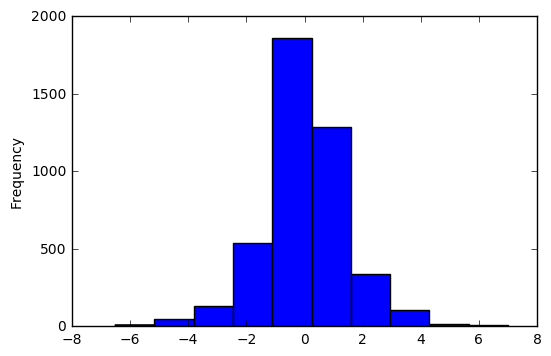

In [230]:
fitted.resid.plot.hist()
pylab.show()

In [231]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


## Task 8

In [232]:
datanew.columns

Index([u'ceb', u'age', u'educ', u'religion', u'idlnchld', u'knowmeth',
       u'usemeth', u'agefm', u'heduc', u'urban', u'electric', u'radio', u'tv',
       u'bicycle', u'nevermarr', u'idlnchld_noans', u'heduc_noans',
       u'usemeth_noans'],
      dtype='object')

In [233]:
del datanew['religion']
del datanew['radio']
del datanew['tv']

In [234]:
datanew.columns

Index([u'ceb', u'age', u'educ', u'idlnchld', u'knowmeth', u'usemeth', u'agefm',
       u'heduc', u'urban', u'electric', u'bicycle', u'nevermarr',
       u'idlnchld_noans', u'heduc_noans', u'usemeth_noans'],
      dtype='object')

In [235]:
m2 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + '\
             'urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=datanew)
fitted = m2.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     559.5
Date:                Fri, 23 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:21:53   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.198     -5.

In [236]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


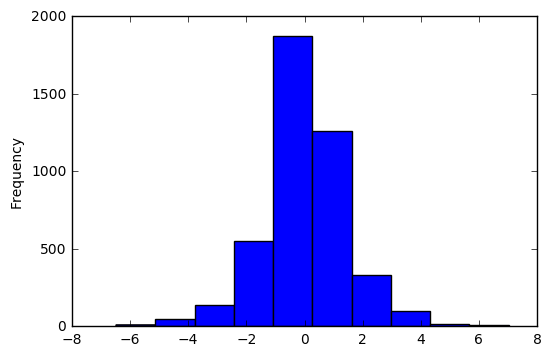

In [237]:
fitted.resid.plot.hist()
pylab.show()

In [239]:
m3 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + usemeth + agefm + heduc + '\
             'urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans + usemeth_noans', 
             data=datanew)
fitted = m3.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     463.4
Date:                Fri, 23 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:24:26   Log-Likelihood:                -7734.5
No. Observations:                4348   AIC:                         1.550e+04
Df Residuals:                    4333   BIC:                         1.559e+04
Df Model:                          14                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.0698      0.258     -4.

In [240]:
print 'Breusch-Pagan test: p=%f' % sms.het_breushpagan(fitted.resid, fitted.model.exog)[1]

Breusch-Pagan test: p=0.000000


In [241]:
print "F=%f, p=%f, k1=%f" % m1.fit().compare_f_test(m2.fit())

F=0.919236, p=0.467231, k1=5.000000


## Task 9

In [242]:
datanew.head(10)

,ceb,age,educ,idlnchld,knowmeth,usemeth,agefm,heduc,urban,electric,bicycle,nevermarr,idlnchld_noans,heduc_noans,usemeth_noans
0,0,18,10,4.0,1.0,1.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
1,2,43,11,2.0,1.0,1.0,20.0,14.0,1,1.0,1.0,0,0,0,0
2,0,49,4,4.0,1.0,0.0,22.0,1.0,1,1.0,0.0,0,0,0,0
3,0,24,12,2.0,1.0,0.0,0.0,-1.0,1,1.0,1.0,1,0,0,0
4,3,32,13,3.0,1.0,1.0,24.0,12.0,1,1.0,1.0,0,0,0,0
5,1,30,5,5.0,1.0,0.0,24.0,7.0,1,1.0,0.0,0,0,0,0
6,3,42,4,3.0,1.0,0.0,15.0,11.0,1,1.0,0.0,0,0,0,0
7,1,36,7,4.0,1.0,1.0,24.0,9.0,1,1.0,0.0,0,0,0,0
8,4,37,16,4.0,1.0,1.0,26.0,17.0,1,1.0,1.0,0,0,0,0
9,1,34,5,4.0,1.0,1.0,18.0,3.0,1,0.0,0.0,0,0,0,0


In [243]:
del datanew['usemeth']
del datanew['usemeth_noans']

In [244]:
m4 = smf.ols('ceb ~ age + educ + idlnchld + knowmeth + agefm + heduc + '\
             'urban + electric + bicycle + nevermarr + idlnchld_noans + heduc_noans', 
             data=datanew)
fitted = m4.fit(cov_type='HC1')
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                    ceb   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     396.4
Date:                Fri, 23 Dec 2016   Prob (F-statistic):               0.00
Time:                        11:40:20   Log-Likelihood:                -7825.7
No. Observations:                4348   AIC:                         1.568e+04
Df Residuals:                    4335   BIC:                         1.576e+04
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -1.1931      0.262     -4.

In [247]:
m3.fit().compare_f_test(m4.fit())[1]

3.1552009480426394e-40